In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
data.shape

(8760, 14)

In [4]:
data[data.duplicated()].shape

(0, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
# Checking for missing values
pd.concat([data.isnull().sum(),round(100*(data.isnull().sum()/len(data)),2)],axis = 1,keys=['Missing Values','% Missing Values'])

,Missing Values,% Missing Values
Date,0,0.0
Rented Bike Count,0,0.0
Hour,0,0.0
Temperature(°C),0,0.0
Humidity(%),0,0.0
Wind speed (m/s),0,0.0
Visibility (10m),0,0.0
Dew point temperature(°C),0,0.0
Solar Radiation (MJ/m2),0,0.0
Rainfall(mm),0,0.0


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_Name'] = data['Date'].dt.day_name()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [9]:
# changing the numeric columns to categorical columns 
change_to_object =['Year','Month','Day','Day_Name','Hour']
for col in change_to_object:
    data[col] = data[col].astype('str')
    print(col + ' : ',data[col].dtype) 

Year :  object
Month :  object
Day :  object
Day_Name :  object
Hour :  object


In [10]:
#renaming columns
data['Visibility'] = data['Visibility (10m)'].apply(lambda x: 1 if x >= 1500 else 0)
data['Solar Radiation'] = data['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.47 else 0)
data['Rainfall'] = data['Rainfall(mm)'].apply(lambda x: 1 if x > 0.23 else 0)
data['Snowfall'] = data['Snowfall (cm)'].apply(lambda x: 1 if x > 0.81 else 0)

data.rename(columns={'Dew point temperature(°C)':'Dew point temperature', 'Wind speed (m/s)':'Wind speed', 
                     'Humidity(%)':'Humidity', 'Temperature(°C)':'Temperature'}, inplace = True)

#changing the chategorical features into the numerical features
data['Functioning_day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HoliDay'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

bike_df = data[['Year', 'Month', 'Day', 'Day_Name', 'Rented Bike Count', 'Hour',  'HoliDay',  'Visibility','Temperature', 
                'Humidity', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind speed']]
bike_df.head()

,Year,Month,Day,Day_Name,Rented Bike Count,Hour,HoliDay,Visibility,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Wind speed
0,2017,1,12,Thursday,254,0,0,1,-5.2,37,-17.6,0,0,0,Winter,2.2
1,2017,1,12,Thursday,204,1,0,1,-5.5,38,-17.6,0,0,0,Winter,0.8
2,2017,1,12,Thursday,173,2,0,1,-6.0,39,-17.7,0,0,0,Winter,1.0
3,2017,1,12,Thursday,107,3,0,1,-6.2,40,-17.6,0,0,0,Winter,0.9
4,2017,1,12,Thursday,78,4,0,1,-6.0,36,-18.6,0,0,0,Winter,2.3


In [11]:
numerical = bike_df.describe().columns
categorical = bike_df.describe(include =['object','category']).columns
print(numerical)
print('_'*75)
print(categorical)

Index(['Rented Bike Count', 'HoliDay', 'Visibility', 'Temperature', 'Humidity',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Wind speed'],
      dtype='object')
___________________________________________________________________________
Index(['Year', 'Month', 'Day', 'Day_Name', 'Hour', 'Seasons'], dtype='object')


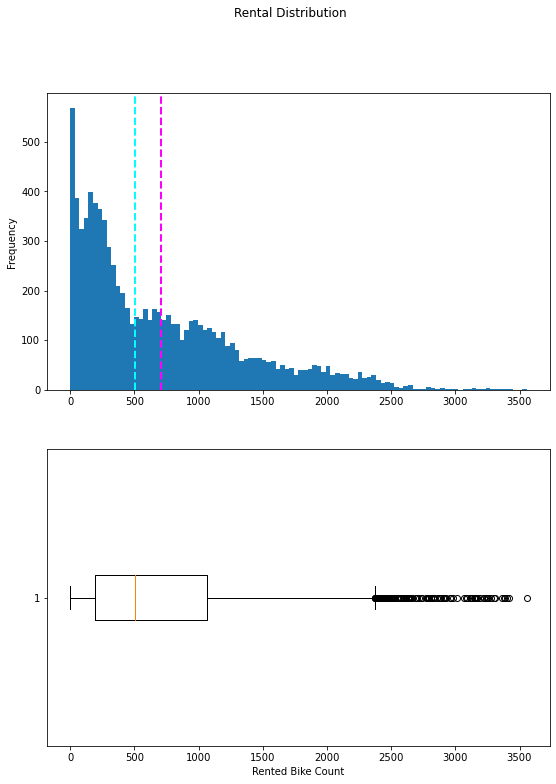

In [12]:
label = bike_df['Rented Bike Count']

# Create a Figure for 2 subplots
fig, ax = plt.subplots(2,1, figsize=(9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Plot the Histogram
ax[0].axvline(label.mean(),color='magenta',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(),color='cyan',linestyle='dashed',linewidth=2)

# plot the boxplot
ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Rented Bike Count')

# Add the title to the figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

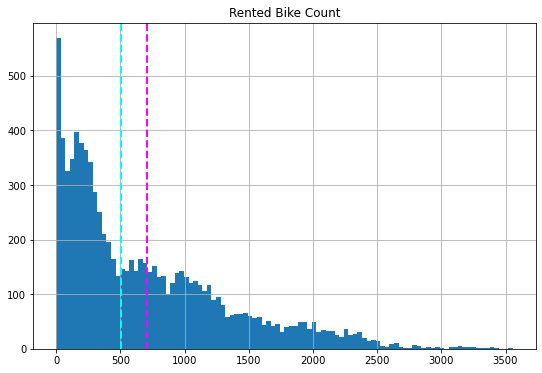

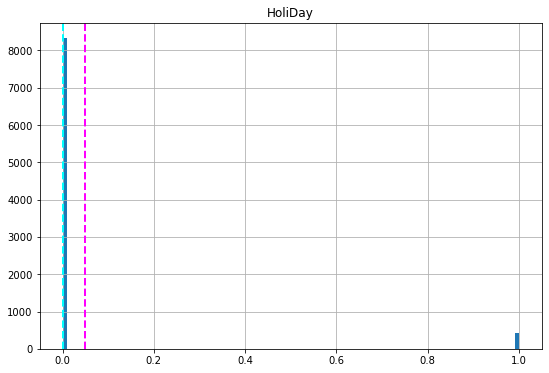

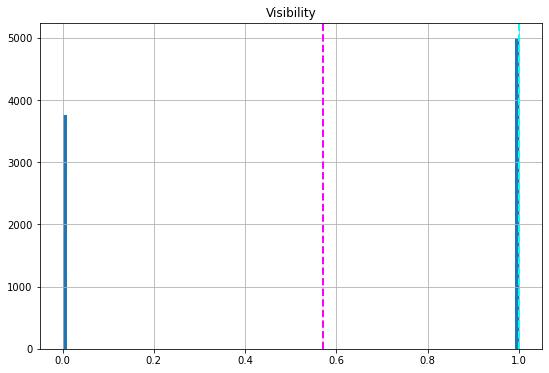

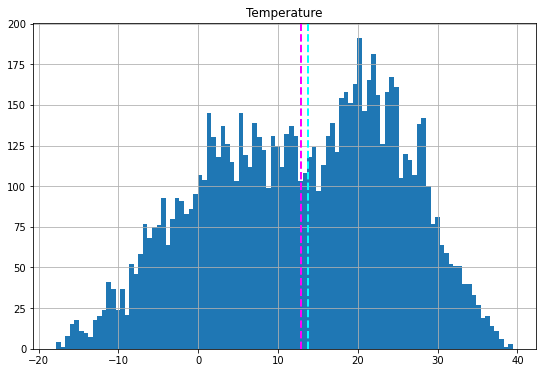

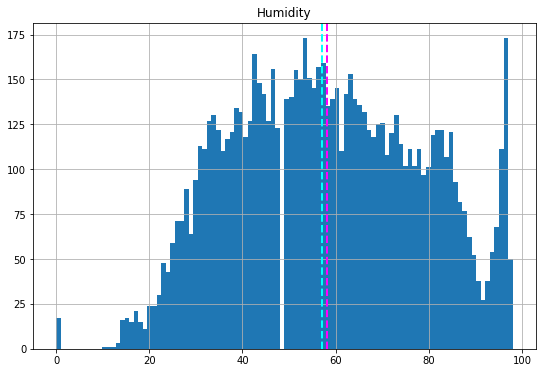

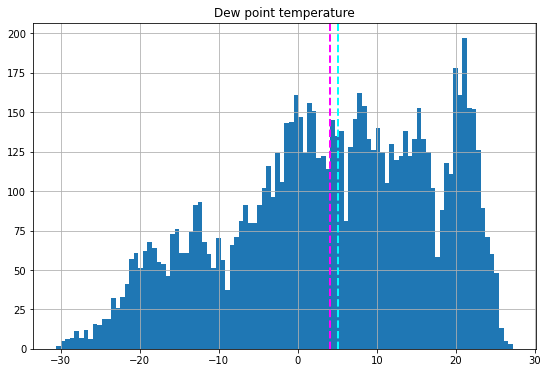

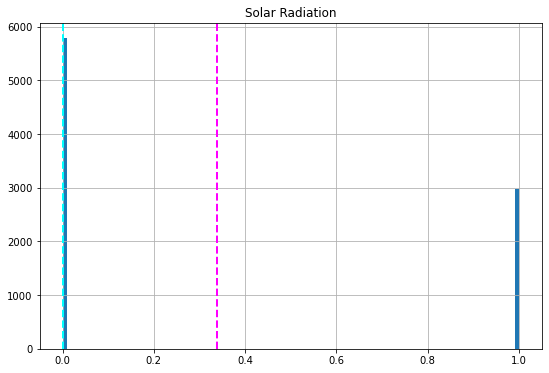

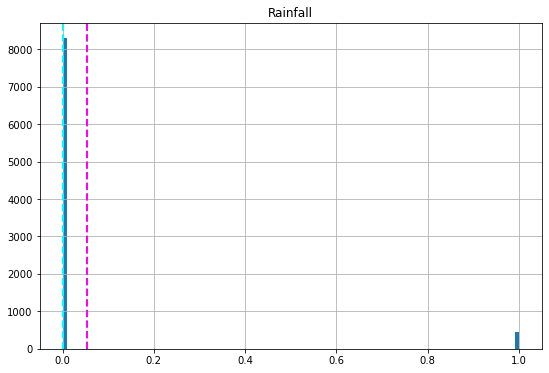

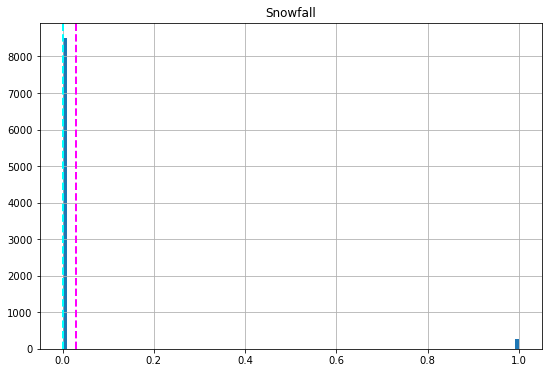

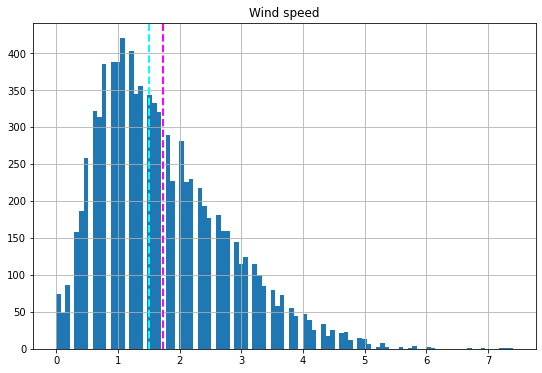

In [13]:
# Plot the histogram for each numeric features
for col in numerical:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=100,ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
    ax.set_title(col)
plt.show()

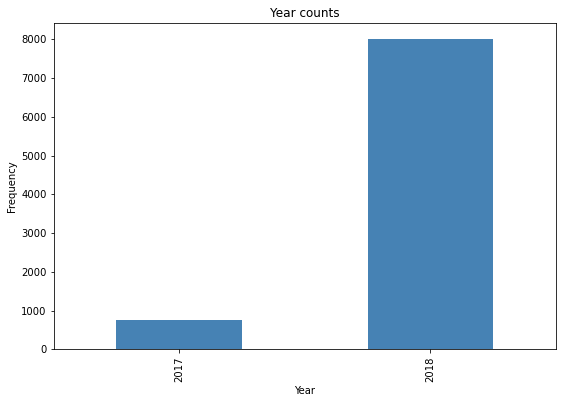

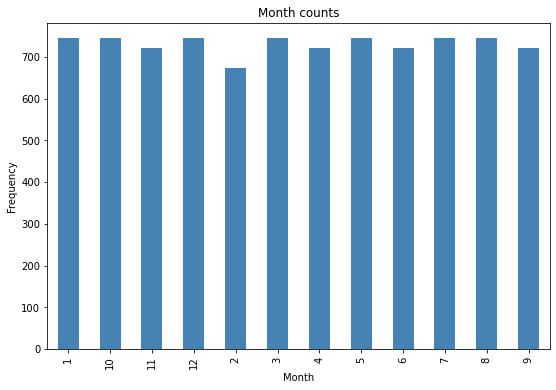

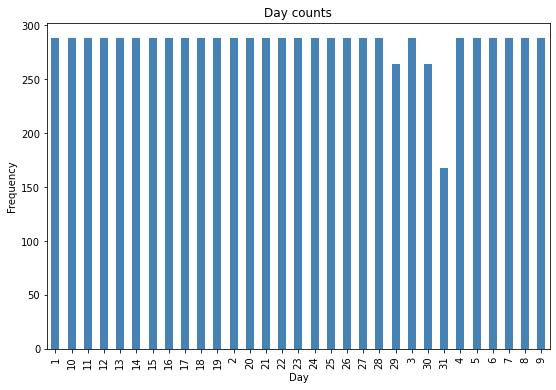

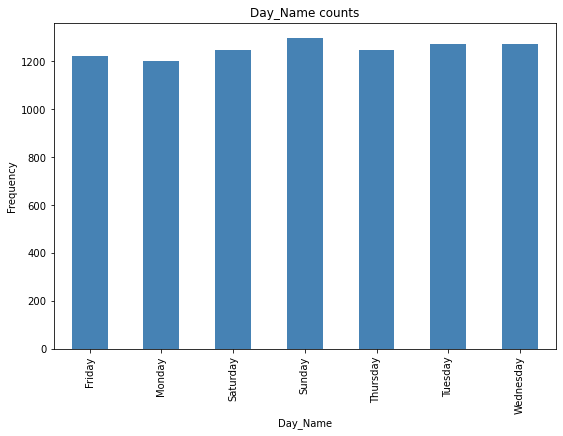

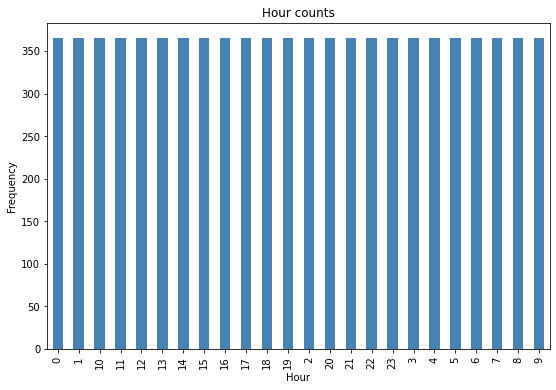

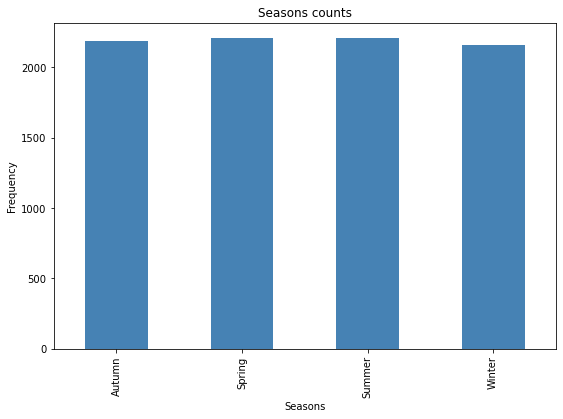

In [14]:
for col in categorical:
    counts = bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

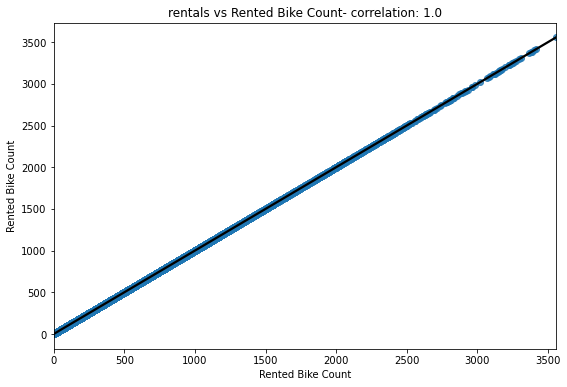

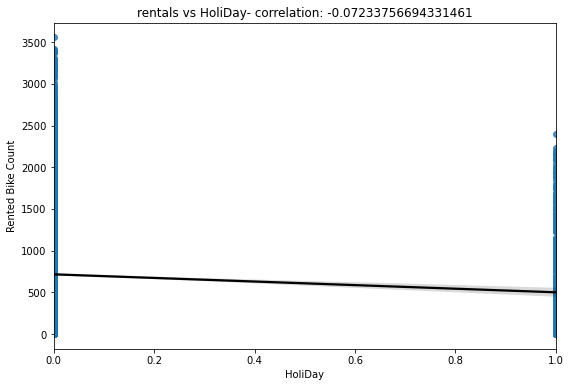

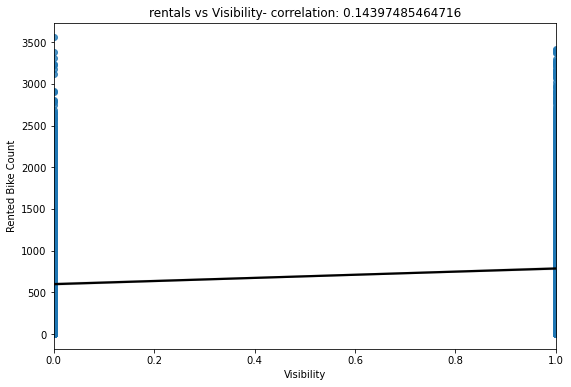

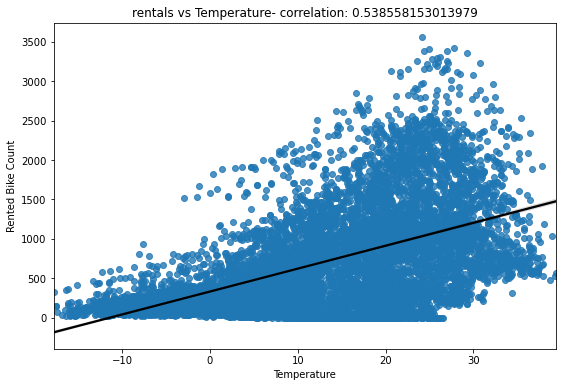

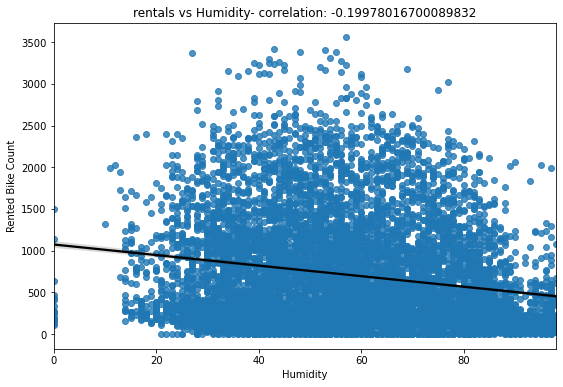

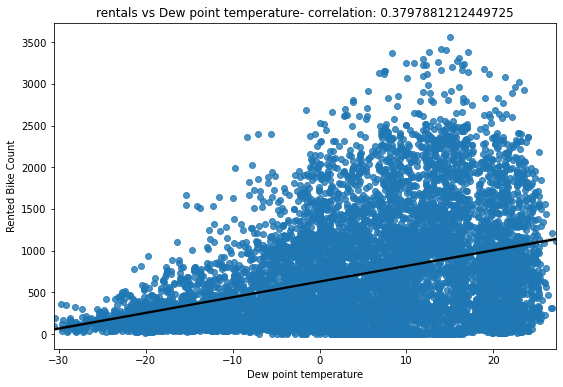

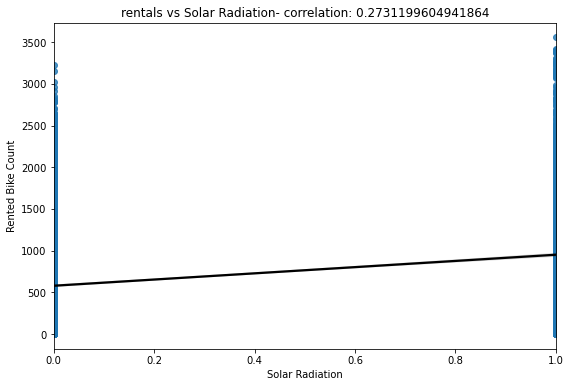

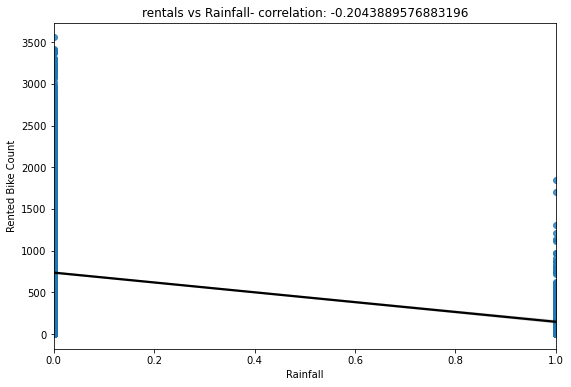

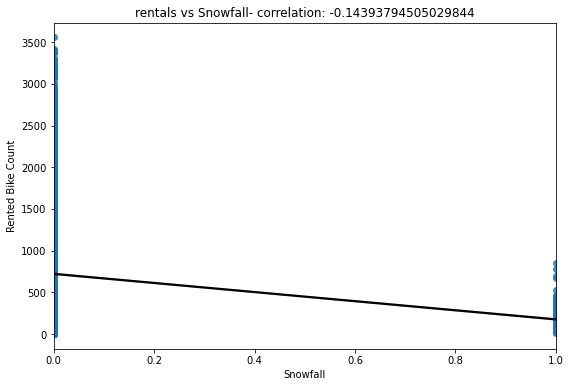

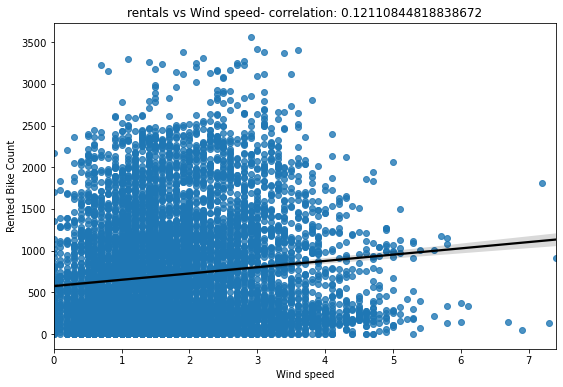

In [15]:
for col in numerical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    sns.regplot(x=feature, y=label,line_kws={"color": "black"})
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

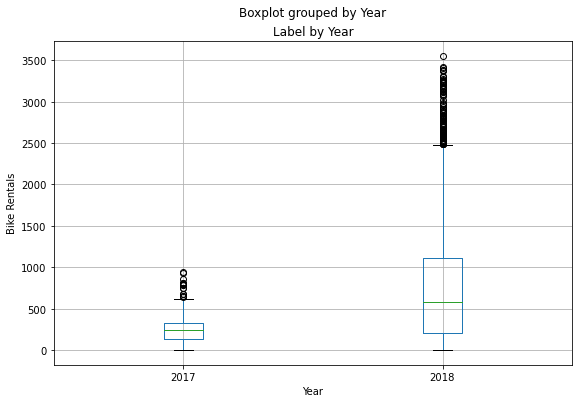

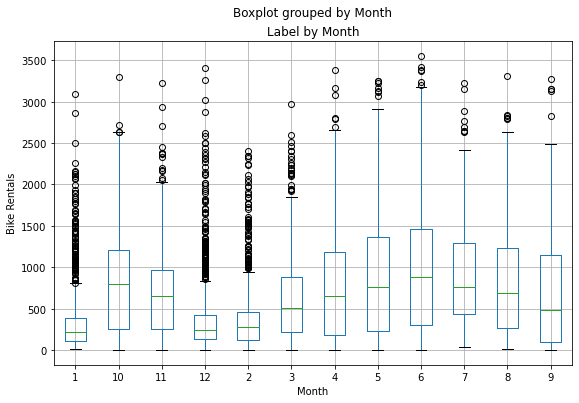

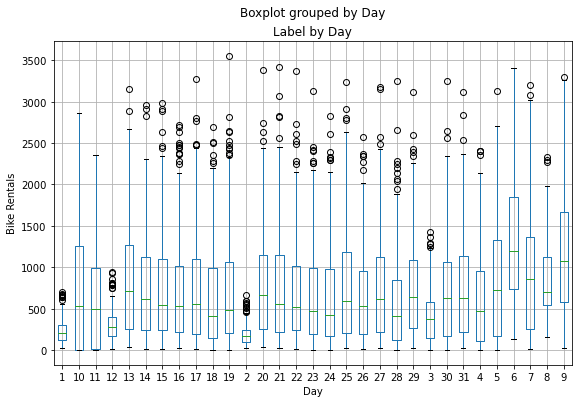

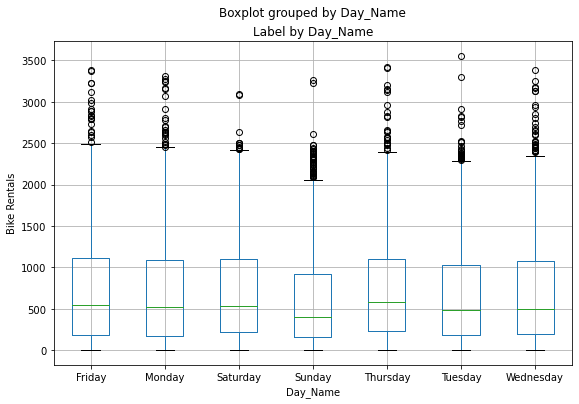

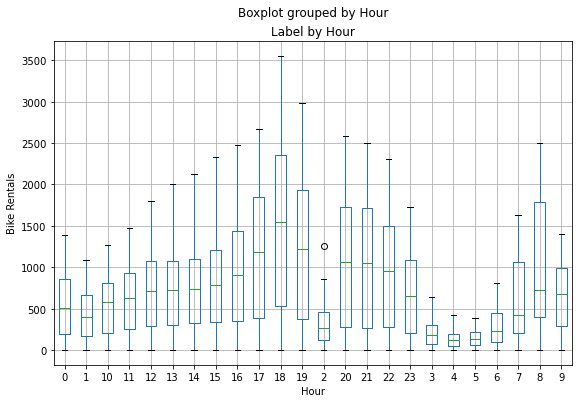

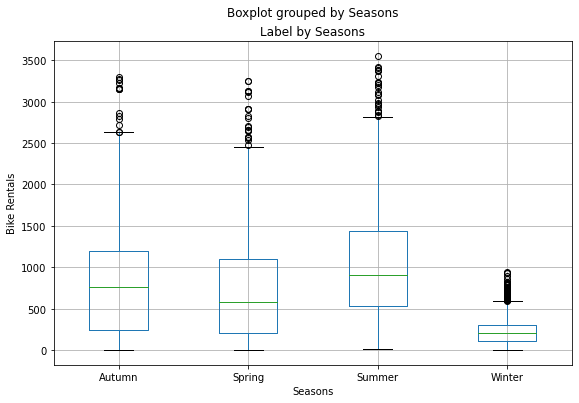

In [16]:
# plot a boxplot for the label by each categorical feature
for col in categorical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

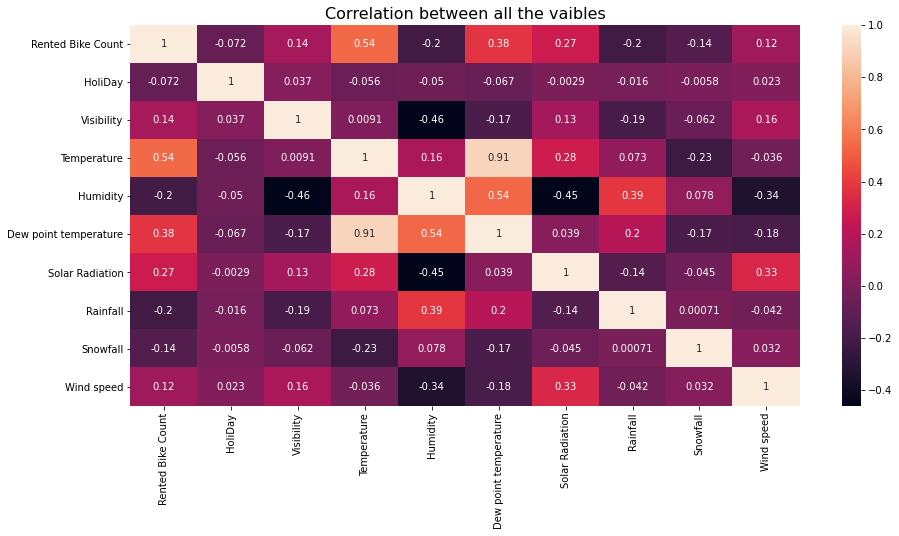

In [17]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(bike_df.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [18]:
#onehot encoding of seasons 
bike_df['Spring'] =np.where(bike_df['Seasons']=='Spring',1,0)
bike_df['Summer'] =np.where(bike_df['Seasons']=='Summer',1,0)
bike_df['Autumn'] =np.where(bike_df['Seasons']=='Autumn',1,0)
bike_df['Winter'] =np.where(bike_df['Seasons']=='Winter',1,0)

In [19]:
bike_df.head()

,Year,Month,Day,Day_Name,Rented Bike Count,Hour,HoliDay,Visibility,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Wind speed,Spring,Summer,Autumn,Winter
0,2017,1,12,Thursday,254,0,0,1,-5.2,37,-17.6,0,0,0,Winter,2.2,0,0,0,1
1,2017,1,12,Thursday,204,1,0,1,-5.5,38,-17.6,0,0,0,Winter,0.8,0,0,0,1
2,2017,1,12,Thursday,173,2,0,1,-6.0,39,-17.7,0,0,0,Winter,1.0,0,0,0,1
3,2017,1,12,Thursday,107,3,0,1,-6.2,40,-17.6,0,0,0,Winter,0.9,0,0,0,1
4,2017,1,12,Thursday,78,4,0,1,-6.0,36,-18.6,0,0,0,Winter,2.3,0,0,0,1


In [20]:
dependent_variable = 'Rented Bike Count'
independent_variable = ['Hour', 'Wind speed', 'Dew point temperature', 'Month', 'HoliDay',  
                        'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Day']

In [21]:
#defining X and y varaibles 
y = bike_df[dependent_variable]
X = bike_df[independent_variable]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [23]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 6132 rows
Test Set: 2628 rows


In [24]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [25]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [26]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 512.  733.  735.  672. 1351.  411. 1017.  610. 1277.  155.]
Actual labels   :  4059     320
6914     580
233      226
982      165
5967     646
2182     190
3996      59
1652     218
7223    1222
776      655
Name: Rented Bike Count, dtype: int64


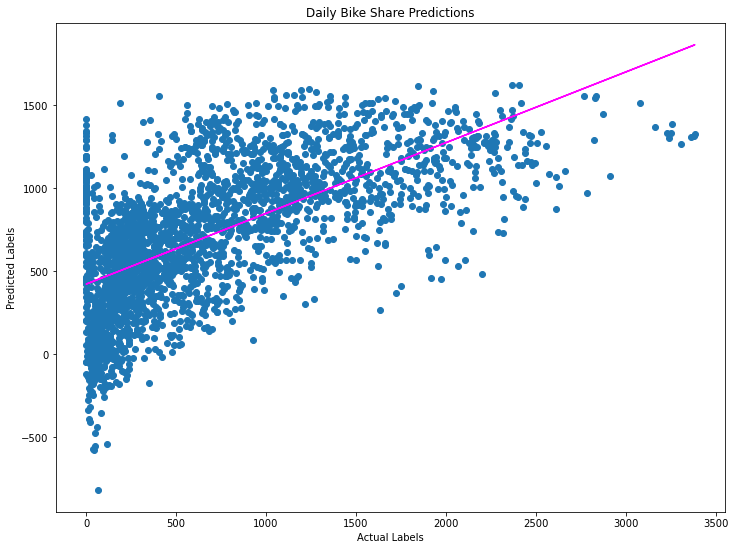

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(12,9))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 237402.18266016815
RMSE: 487.2393484317211
R2: 0.41804730277202284


## Lasso

Lasso() 

MSE: 237304.2209808997
RMSE: 487.1388107930836
R2: 0.4182874398374722


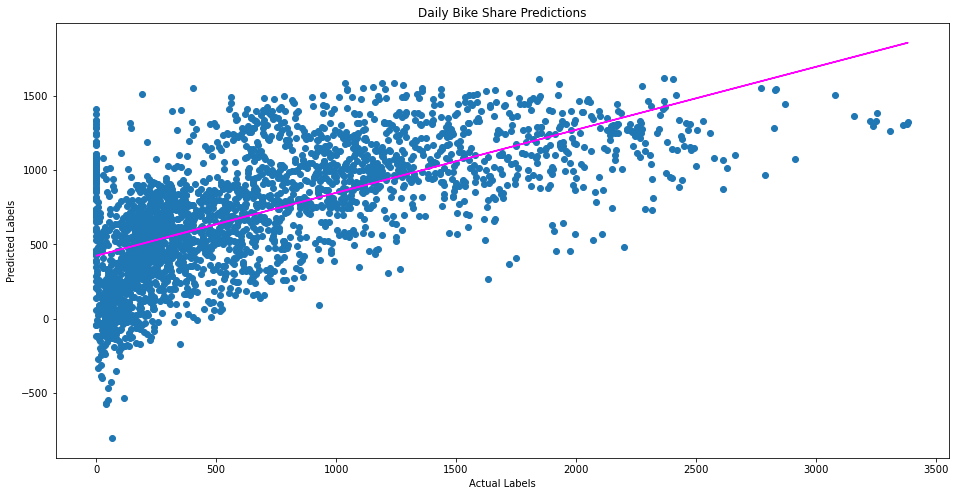

In [29]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_0 <= -0.72
|   |--- feature_0 <= -1.44
|   |   |--- feature_2 <= 0.31
|   |   |   |--- feature_2 <= -0.51
|   |   |   |   |--- feature_2 <= -1.34
|   |   |   |   |   |--- feature_2 <= -1.70
|   |   |   |   |   |   |--- feature_3 <= 1.44
|   |   |   |   |   |   |   |--- feature_2 <= -2.06
|   |   |   |   |   |   |   |   |--- feature_9 <= 1.01
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.88
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.42
|   |   |   |   |   |   |   |   |   |   |   |--- value: [89.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  1.42
|   |   |   |   |   |   |   |   |   |   |   |--- value: [90.00]
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.88
|   |   |   |   |   |   |   |   |   |   |--- value: [87.00]
|   |   |   |   |   |   |   |   |--- feature_9 >  1.01
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -2.41
|   |   |   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   

MSE: 172233.51293759514
RMSE: 415.0102564245794
R2: 0.5777976584547204


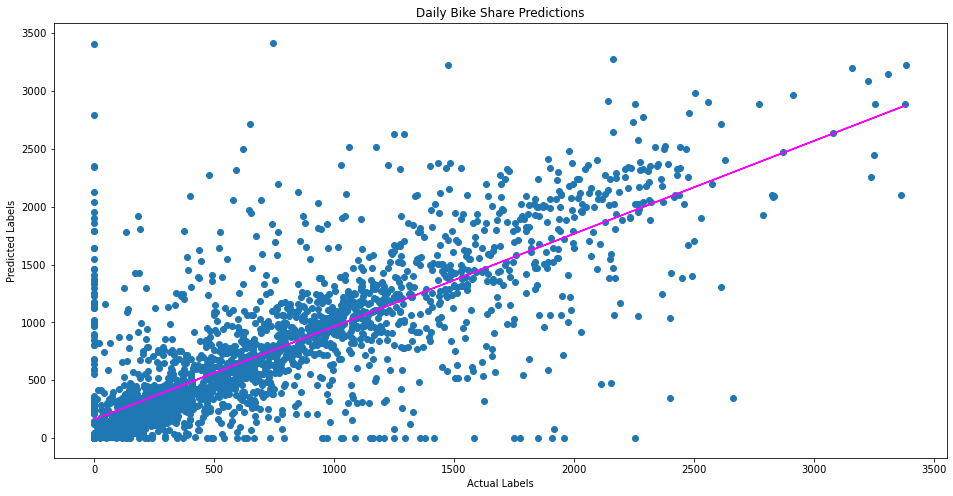

In [31]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Random Forest Regressor

RandomForestRegressor() 

MSE: 93201.60791761796
RMSE: 305.28938389275504
R2: 0.7715314724326564


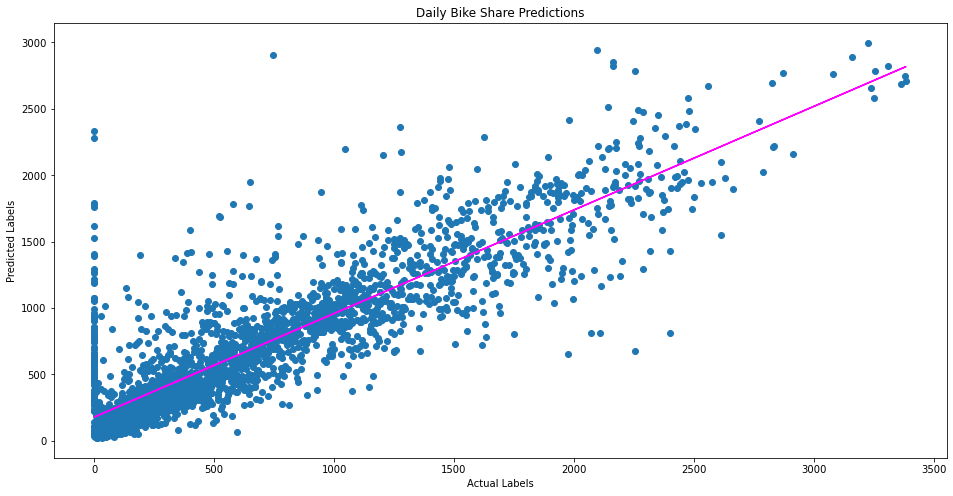

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Gradient Boosting

GradientBoostingRegressor() 

MSE: 125429.14516190325
RMSE: 354.1597734948215
R2: 0.6925309257056964


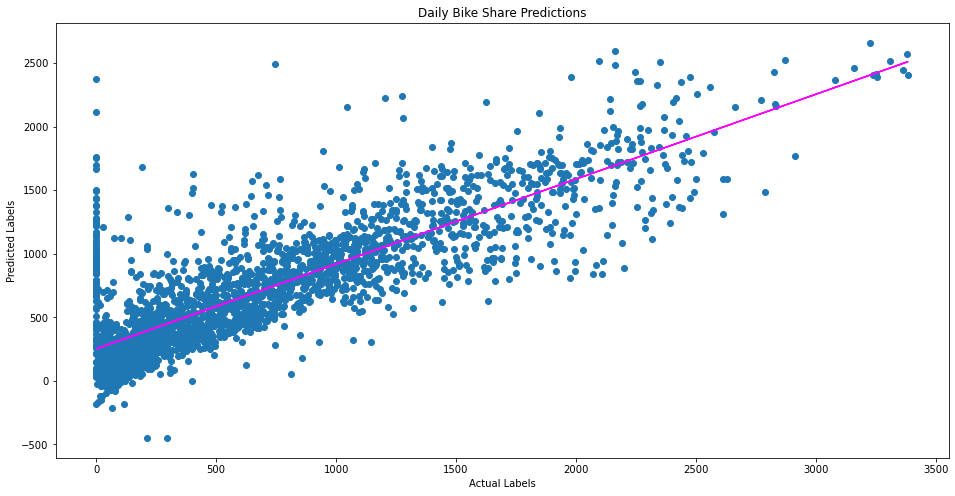

In [33]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimizing Hyperparameters

Best parameter combination: {'learning_rate': 0.5, 'n_estimators': 150} 

GradientBoostingRegressor(learning_rate=0.5, n_estimators=150) 

MSE: 94510.77487415486
RMSE: 307.4260478133804
R2: 0.7683222633472919


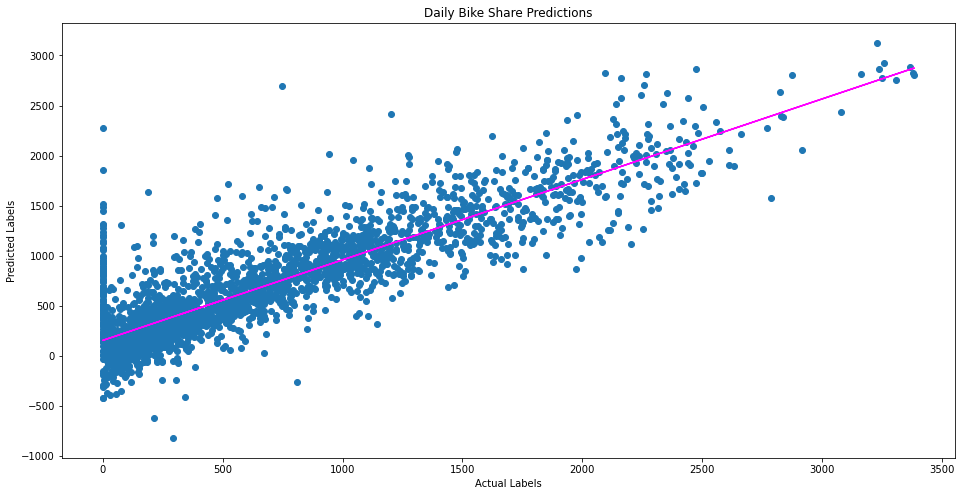

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [35]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 160310.1906730619
RMSE: 400.3875505969958
R2: 0.6070257366215337


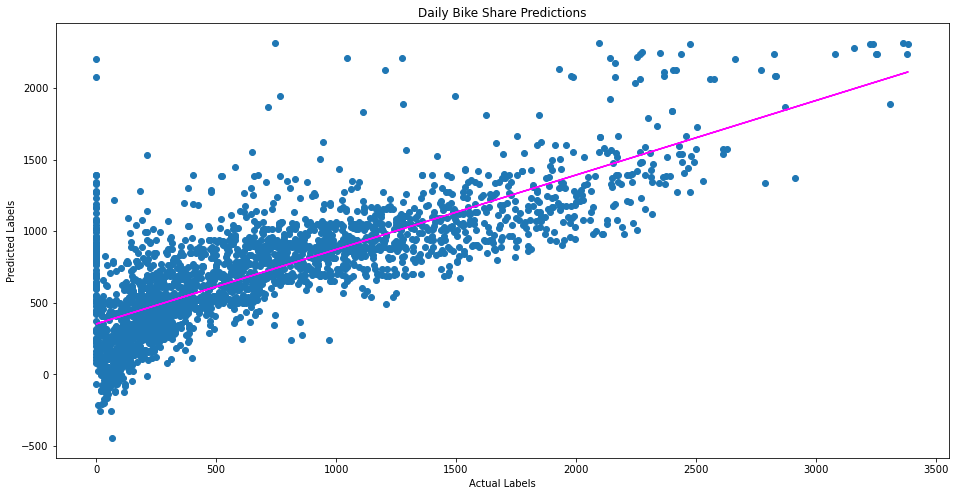

In [36]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 148043.8122380137
RMSE: 384.76461926483535
R2: 0.6370947609898303


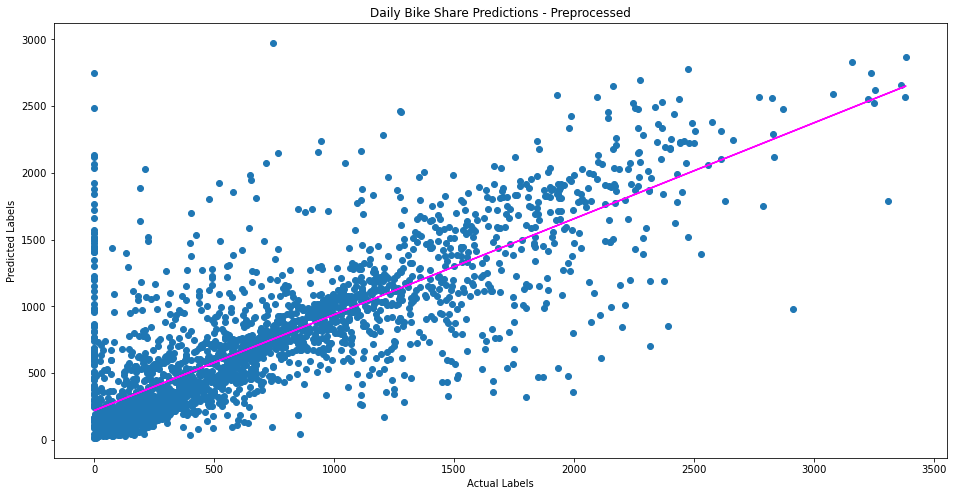

In [37]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.figure(figsize=(16,8))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [38]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

In [39]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 209 rentals


In [40]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
775.0
807.0
206.0
209.0
209.0
